In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [6]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
Name: price, dtype: float64

In [7]:
df_corr_grade = df.corr()['grade'].map(abs).sort_values(ascending=False)
df_corr_grade

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bedrooms         0.356563
view             0.249727
long             0.200341
zipcode          0.185771
condition        0.146896
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.016669
id               0.008188
Name: grade, dtype: float64

In [8]:
df.grade.mean()

7.657915451220076

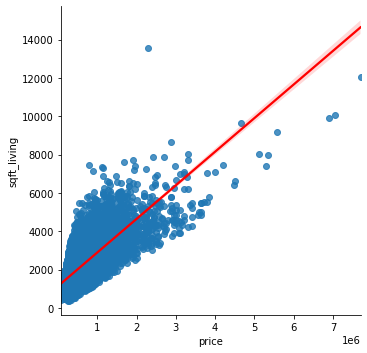

In [9]:
sns.lmplot(x='price', y='sqft_living', data=df, line_kws={'color': 'red'})
plt.show();

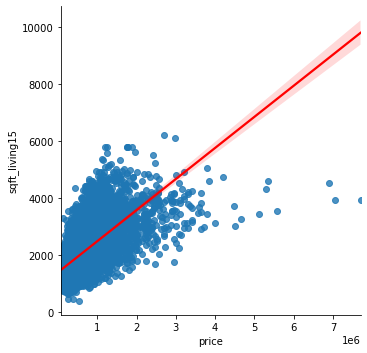

In [10]:
sns.lmplot(x='price', y='sqft_living15', data=df, line_kws={'color': 'red'})
plt.show();

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(['date', 'id', 'sqft_basement', 'waterfront', 'view', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2304.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:17:01   Log-Likelihood:            -2.4320e+05
No. Observations:               17755   AIC:                         4.864e+05
Df Residuals:                   17739   BIC:                         4.866e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.884e+06   3.44e+06     -2.294      0.022   -1.46e+07   -1.15e+06
bedrooms      -4.667e+04   2206.179    -21.153      0.000    -5.1e+04   -4.23e+04
bathrooms      4.632e+04   3842.319     12.054      0.000    3.88e+04    5.38e+04
sqft_living     180.0238      5.089     35.377      0.000     170.049     189.998
sqft_lot          0.1330      0.056      2.389      0.017       0.024       0.242
floors         6280.4575   4251.993      1.477      0.140   -2053.865    1.46e+04
condition      2.905e+04   2769.655     10.489      0.000    2.36e+04    3.45e+04
grade           9.89e+04   2553.279     38.734      0.000    9.39e+04    1.04e+05
sqft_above       14.6137      5.054      2.891      0.004       4.707      24.520
yr_built      -2837.9348     85.431    -33.219      0.000   -3005.388   -2670.482
yr_renovated     36.1976      4.318      8.384      0.000      27.735      44.660
zipcode        -465.2620     38.670    -12.031      0.000    -541.060    -389.464
lat            5.567e+05   1.26e+04     44.245      0.000    5.32e+05    5.81e+05
long          -2.609e+05   1.55e+04    -16.875      0.000   -2.91e+05   -2.31e+05
sqft_living15    37.4900      4.036      9.288      0.000      29.579      45.401
sqft_lot15       -0.2840      0.085     -3.330      0.001      -0.451      -0.117
==============================================================================
Omnibus:                    16420.427   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1776254.962
Skew:                           4.092   Prob(JB):                         0.00
Kurtosis:                      51.312   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_low_price = df.loc[df['price']<= 199999]
df_low_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
92,4168000060,2/26/2015,153000.0,3,1.00,1200,10500,1.0,0.0,0.0,...,7,1200,0.0,1962,0.0,98023,47.3220,-122.351,1350,10500
97,1099611230,9/12/2014,199000.0,4,1.50,1160,6400,1.0,0.0,0.0,...,7,1160,0.0,1975,0.0,98023,47.3036,-122.378,1160,6400
107,3530510041,7/23/2014,188500.0,2,1.75,1240,2493,1.0,0.0,0.0,...,8,1240,0.0,1985,0.0,98198,47.3813,-122.322,1270,4966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20387,6056100150,6/23/2014,160797.0,3,1.50,1270,2356,2.0,0.0,0.0,...,7,1270,0.0,2012,0.0,98108,47.5671,-122.298,1490,2175
20596,2724049222,8/2/2014,163800.0,2,2.50,1000,1092,2.0,0.0,0.0,...,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20791,6056100160,7/28/2014,182568.0,4,1.50,1500,2106,2.0,0.0,0.0,...,7,1500,0.0,2014,0.0,98108,47.5669,-122.297,1490,2175
20946,1278000210,3/11/2015,110000.0,2,1.00,828,4524,1.0,0.0,0.0,...,6,828,0.0,1968,2007.0,98001,47.2655,-122.244,828,5402


In [25]:
df_middle_price = df.loc[(200000 <= df['price']) & (df['price'] <= 499999)]
df_middle_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
df.price.mean()

540296.5735055795

In [23]:
df_higher_price = df.loc[df['price']>= 500000]
df_higher_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,9,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.0,5,3.75,4470,8088,2.0,0.0,0.0,...,11,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,0.0,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,0.0,NaN,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


In [26]:
predictors = df_low_price.drop(['date', 'id', 'sqft_basement', 'waterfront', 'view', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df_low_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     11.53
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.45e-25
Time:                        13:34:03   Log-Likelihood:                -7409.2
No. Observations:                 643   AIC:                         1.485e+04
Df Residuals:                     627   BIC:                         1.492e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.644e+06   1.64e+06      1.002      0.317   -1.58e+06    4.87e+06
bedrooms       2344.7991   1649.463      1.422      0.156    -894.341    5583.940
bathrooms      6354.3482   3141.373      2.023      0.044     185.461    1.25e+04
sqft_living      15.0683      7.151      2.107      0.035       1.026      29.111
sqft_lot          0.0492      0.022      2.276      0.023       0.007       0.092
floors          169.1988   4152.564      0.041      0.968   -7985.419    8323.816
condition      7561.5957   1506.174      5.020      0.000    4603.839    1.05e+04
grade          8486.4735   1680.441      5.050      0.000    5186.500    1.18e+04
sqft_above       -0.6790      7.145     -0.095      0.924     -14.709      13.352
yr_built        -49.8432     59.254     -0.841      0.401    -166.204      66.518
yr_renovated      1.9427      3.155      0.616      0.538      -4.252       8.138
zipcode          -9.9325     18.793     -0.529      0.597     -46.837      26.972
lat            1729.9891   1.21e+04      0.143      0.886    -2.2e+04    2.54e+04
long           4865.8113   8108.594      0.600      0.549   -1.11e+04    2.08e+04
sqft_living15    -1.2402      3.701     -0.335      0.738      -8.508       6.027
sqft_lot15       -0.0899      0.079     -1.139      0.255      -0.245       0.065
==============================================================================
Omnibus:                       29.482   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.727
Skew:                          -0.553   Prob(JB):                     7.82e-08
Kurtosis:                       3.009   Cond. No.                     1.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
predictors = df_middle_price.drop(['date', 'id', 'sqft_basement', 'waterfront', 'view', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df_middle_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     617.3
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:34:17   Log-Likelihood:            -1.1788e+05
No. Observations:                9519   AIC:                         2.358e+05
Df Residuals:                    9503   BIC:                         2.359e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.773e+06   1.23e+06     -7.117      0.000   -1.12e+07   -6.36e+06
bedrooms      -7433.0058    940.895     -7.900      0.000   -9277.362   -5588.650
bathrooms      1.462e+04   1543.781      9.468      0.000    1.16e+04    1.76e+04
sqft_living      34.2533      2.327     14.721      0.000      29.692      38.815
sqft_lot          0.1782      0.031      5.812      0.000       0.118       0.238
floors         1.355e+04   1639.561      8.264      0.000    1.03e+04    1.68e+04
condition      7311.3531   1029.568      7.101      0.000    5293.180    9329.526
grade          2.763e+04   1096.517     25.194      0.000    2.55e+04    2.98e+04
sqft_above       -0.2882      2.295     -0.126      0.900      -4.787       4.211
yr_built       -542.6880     35.904    -15.115      0.000    -613.068    -472.308
yr_renovated      3.2541      1.913      1.701      0.089      -0.495       7.003
zipcode         -16.6638     13.803     -1.207      0.227     -43.720      10.392
lat            3.178e+05   4382.352     72.517      0.000    3.09e+05    3.26e+05
long           2.962e+04   5370.015      5.516      0.000    1.91e+04    4.01e+04
sqft_living15    22.1331      1.890     11.708      0.000      18.428      25.839
sqft_lot15        0.0823      0.040      2.072      0.038       0.004       0.160
==============================================================================
Omnibus:                       12.651   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.099
Skew:                           0.068   Prob(JB):                      0.00143
Kurtosis:                       3.120   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
predictors = df_higher_price.drop(['date', 'id', 'sqft_basement', 'waterfront', 'view', 'price'], axis = 1)
predict= '+'.join(predictors)
f = 'price ~' + predict
model = ols(formula=f, data=df_higher_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     662.0
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:34:32   Log-Likelihood:            -1.0598e+05
No. Observations:                7593   AIC:                         2.120e+05
Df Residuals:                    7577   BIC:                         2.121e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.773e+06   7.55e+06      1.030      0.303   -7.02e+06    2.26e+07
bedrooms      -4.562e+04   3931.870    -11.603      0.000   -5.33e+04   -3.79e+04
bathrooms      6.384e+04   6992.633      9.130      0.000    5.01e+04    7.75e+04
sqft_living     191.6601      8.444     22.699      0.000     175.108     208.212
sqft_lot          0.1680      0.090      1.870      0.062      -0.008       0.344
floors         -2.15e+04   8297.964     -2.591      0.010   -3.78e+04   -5229.978
condition      1.993e+04   5670.234      3.515      0.000    8815.426     3.1e+04
grade          1.006e+05   4700.259     21.396      0.000    9.14e+04     1.1e+05
sqft_above       29.8812      8.549      3.495      0.000      13.123      46.639
yr_built      -2961.8580    160.113    -18.499      0.000   -3275.723   -2647.992
yr_renovated     38.8200      7.309      5.312      0.000      24.493      53.147
zipcode       -1302.1766     85.324    -15.262      0.000   -1469.435   -1134.918
lat            4.426e+05   3.86e+04     11.469      0.000    3.67e+05    5.18e+05
long          -8.507e+05   3.53e+04    -24.127      0.000    -9.2e+05   -7.82e+05
sqft_living15    45.6639      6.845      6.671      0.000      32.245      59.083
sqft_lot15       -0.4288      0.143     -3.003      0.003      -0.709      -0.149
==============================================================================
Omnibus:                     5556.842   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232471.619
Skew:                           3.052   Prob(JB):                         0.00
Kurtosis:                      29.411   Cond. No.                     2.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""